In [38]:
import numpy as np
import random
import importlib
import matplotlib.pyplot as plt
import multiprocessing as mp
import tables as pt
import check_entropy
importlib.reload(check_entropy)
from check_entropy import *
line = lambda x,a,b : a*x+b
from scipy.optimize import curve_fit

In [4]:
# import a curve
S_curve = np.load('/home/hcleroy/PostDoc/aging_condensates/Simulation/Evolution_of_the_entropy/Res/10_20_30_linkers/20_linker.npy')
popt,pconv = curve_fit(line,np.log(S_curve[4:,0]),S_curve[4:,1])


Text(0, 0.5, 'Entropy')

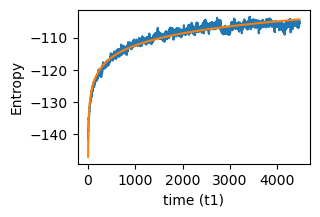

In [5]:
fig,ax = plt.subplots(figsize=(3,2))
ax.plot(S_curve[4:,0],S_curve[4:,1])
ax.plot(S_curve[4:,0],line(np.log(S_curve[4:,0]),*popt))
#ax.set_xscale('log')
ax.set_xlabel('time (t1)')
ax.set_ylabel('Entropy')

Text(0, 0.5, 'Entropy')

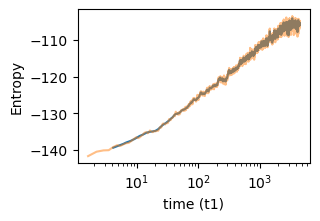

In [6]:
X_av,Y_av = moving_average(S_curve[4:,0],S_curve[4:,1],10)
fig,ax = plt.subplots(figsize=(3,2))
ax.plot(X_av,Y_av)
ax.plot(S_curve[4:,0],S_curve[4:,1],alpha=0.5)
ax.set_xscale('log')
ax.set_xlabel('time (t1)')
ax.set_ylabel('Entropy')

In [39]:
# gillespie parameter
Nlinker = 20
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 1/(V) # for 1D
Energy = -15
Nprocess = 12
seeds = random.sample(range(0,10000000),Nprocess)
args = [[ell_tot,Energy,kdiff,seeds[i],Nlinker,3] for i in range(Nprocess)]
# Simulation parameters
step_tot = 200000
compute_steps = 1000

In [40]:
Parallel_pictures(args,step_tot,compute_steps,'20_linkers_E_15.hdf5',1,X_av,Y_av)

In [41]:
file = pt.open_file('20_linkers_E_15.hdf5',mode='r')

In [42]:
for node in file.walk_nodes('/', classname='Array'):
    print(node)

/R_0x10c092 (Array(200, 22, 3)) ''
/R_0x2e6070 (Array(200, 22, 3)) ''
/R_0x387e1a (Array(200, 22, 3)) ''
/R_0x40a735 (Array(200, 22, 3)) ''
/R_0x45fdb9 (Array(200, 22, 3)) ''
/R_0x50e812 (Array(200, 22, 3)) ''
/R_0x50ede7 (Array(200, 22, 3)) ''
/R_0x58475 (Array(200, 22, 3)) ''
/R_0x60178d (Array(200, 22, 3)) ''
/R_0x646363 (Array(200, 22, 3)) ''
/R_0x7b36cc (Array(200, 22, 3)) ''
/R_0x85302e (Array(200, 22, 3)) ''
/ell_coordinates0x10c092 (Array(200, 20)) ''
/ell_coordinates0x2e6070 (Array(200, 20)) ''
/ell_coordinates0x387e1a (Array(200, 20)) ''
/ell_coordinates0x40a735 (Array(200, 20)) ''
/ell_coordinates0x45fdb9 (Array(200, 20)) ''
/ell_coordinates0x50e812 (Array(200, 20)) ''
/ell_coordinates0x50ede7 (Array(200, 20)) ''
/ell_coordinates0x58475 (Array(200, 20)) ''
/ell_coordinates0x60178d (Array(200, 20)) ''
/ell_coordinates0x646363 (Array(200, 20)) ''
/ell_coordinates0x7b36cc (Array(200, 20)) ''
/ell_coordinates0x85302e (Array(200, 20)) ''


In [43]:
Rs = file.root.R_0x10c092.read()
Ells = file.root.ell_coordinates0x10c092.read()

In [44]:
file.close()

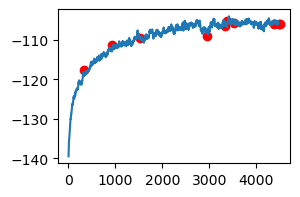

In [46]:
plt.figure(figsize=(3,2))
plt.scatter(Rs[:,1,0],Rs[:,0,0],color='red')
plt.plot(X_av,Y_av)

In [47]:
indexs = np.argwhere(~np.isnan(Rs[:,1,0]))[:,0]

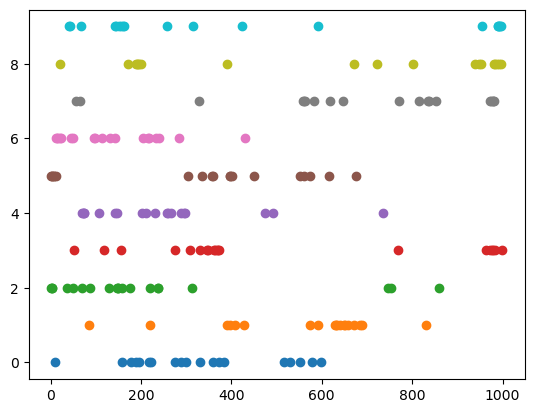

In [48]:
for i in range(indexs.shape[0]):
    #print(Ells[indexs[i]][0])
    #print(Ells[indexs[i]][-1])
    #print()
    plt.scatter(Ells[indexs[i]],[i for _ in range(Ells[indexs[i]].shape[0])])

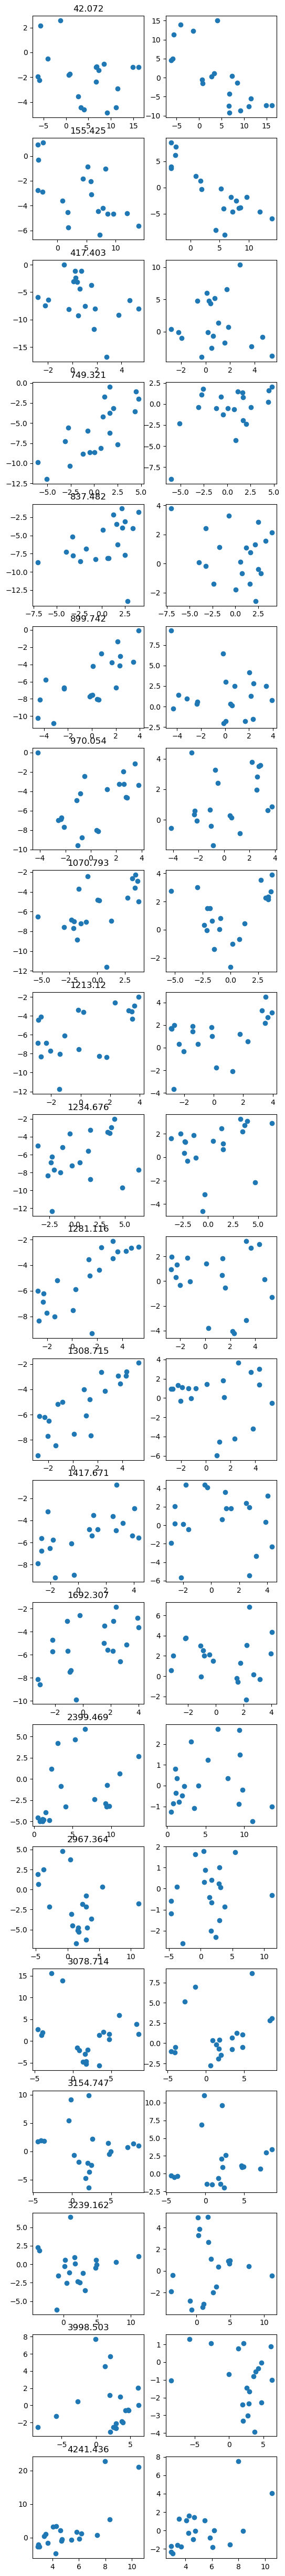

In [115]:
fig,ax = plt.subplots(nrows= indexs.shape[0],ncols=2,figsize=(6,3*indexs.shape[0]))
for i,index in enumerate(indexs) :
    ax[i,0].set_title(str(truncate(Rs[index,1,0],3)))    
    ax[i,0].scatter(Rs[index,2:,0],Rs[index,2:,1])
    ax[i,1].scatter(Rs[index,2:,0],Rs[index,2:,2])

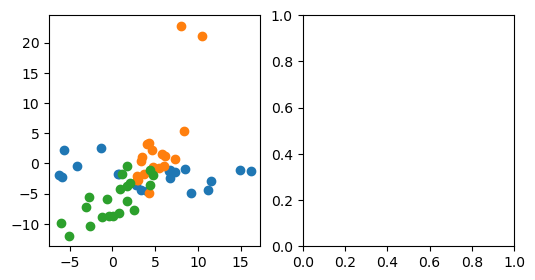

In [116]:
fig,ax = plt.subplots(ncols=2,figsize=(6,3))
ax[0].scatter(Rs[indexs[0],2:,0],Rs[indexs[0],2:,1])

ax[0].scatter(Rs[indexs[-1],2:,0],Rs[indexs[-1],2:,1])
ax[0].scatter(Rs[indexs[3],2:,0],Rs[indexs[3],2:,1])